# Dates Inspection 

# Step 1 : Mark Defected

In [18]:
#Load Modules
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

True

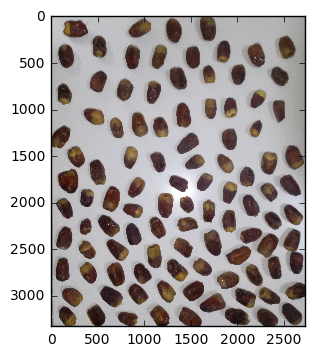

In [19]:
#Load Image
originalImage = cv2.imread("./assets/img/Dates Counting/dates04.jpg")
originalImageDisplay = originalImage.copy()
originalImage_H, originalImage_W, _=originalImage.shape
originalImage = cv2.resize(originalImage,(int(originalImage_W/6),int(originalImage_H/6)))
originalImage_gray = cv2.cvtColor(originalImage,cv2.COLOR_BGR2GRAY)
#Display
plt.imshow(cv2.cvtColor(originalImageDisplay, cv2.COLOR_BGR2RGB))
cv2.imwrite("./assets/img/Dates Counting/originalImageDisplay.png",originalImageDisplay)

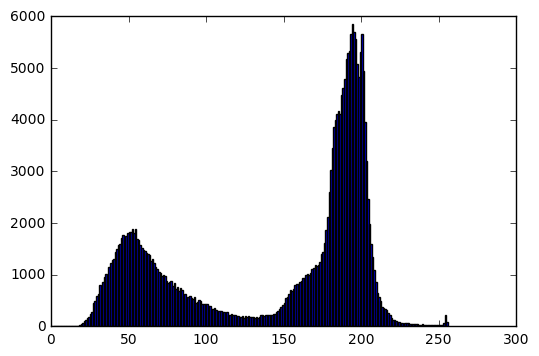

In [20]:
#Plotting Histogram to analyize the Image
plt.hist(originalImage_gray.ravel(),256,[0,256]); plt.show()

In [21]:
#Histogram Normalization Using CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
originalImage_grayEQ = clahe.apply(originalImage_gray)

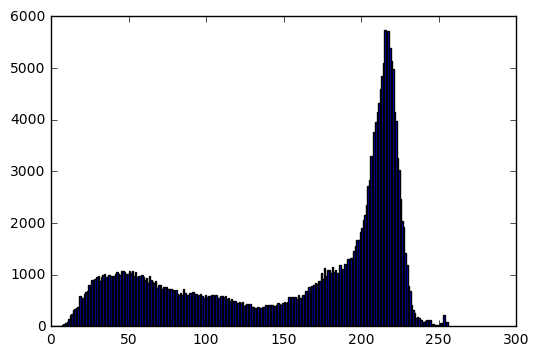

In [22]:
#Plotting Histogram Again
plt.hist(originalImage_grayEQ.ravel(),256,[0,256]); plt.show()

In [23]:
#Thresholding to Subtract the White Backgroung
bkgrndThresh = cv2.inRange(originalImage_gray,145,255)
bkgrndThresh = cv2.bitwise_not(bkgrndThresh)
bkgrndThresh = cv2.cvtColor(bkgrndThresh, cv2.COLOR_GRAY2BGR)

True

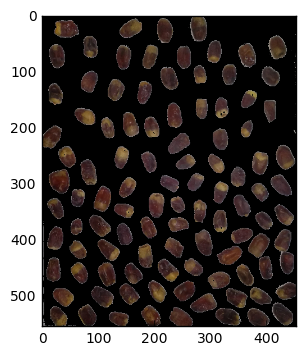

In [24]:
#Mask "bkgrndThresh" with "OriginalImage"
im_out = originalImage & bkgrndThresh
plt.imshow(cv2.cvtColor(im_out, cv2.COLOR_BGR2RGB))
cv2.imwrite("./assets/img/Dates Counting/im_out.png",im_out)

In [25]:
#Set HeatMap for the New Masked Image
heatmapImage = cv2.applyColorMap(im_out,cv2.COLORMAP_JET) 

In [26]:
#Threshold the Defect Areas Values
#Note --> it differes with the Surrounding Environment 
defectRange = cv2.inRange(heatmapImage,(94,252,0),(255,255,162))

In [27]:
#Get Contours of the Defected Areas
defectRangeContoursImage, contours, hierarchy = cv2.findContours(defectRange,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [28]:
#Loop on Contours and Plot "+" sign on the Displayed Image
originalImagePlotDefects = originalImage.copy()

defectedCounter = 0
for c in contours:
    if (cv2.contourArea(c) > 15):
        M = cv2.moments(c)
        if(M["m00"]>0):
            defectedCounter += 1
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(originalImagePlotDefects,"+", (cX,cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,255),2)

Number of Estimated Defects: 51


True

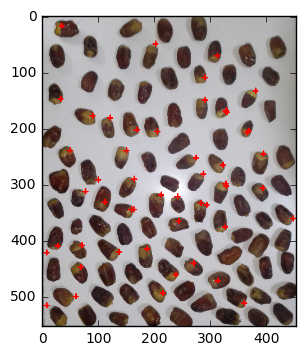

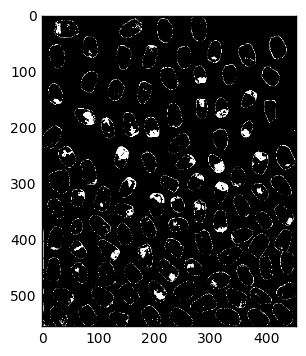

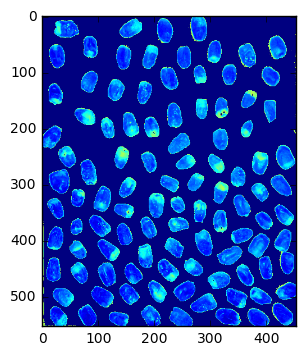

In [29]:
#Display
print ("Number of Estimated Defects: "+str(defectedCounter))
plt.imshow(cv2.cvtColor(originalImagePlotDefects, cv2.COLOR_BGR2RGB));plt.figure()
cv2.imwrite("./assets/img/Dates Counting/originalImagePlotDefects.png",originalImagePlotDefects)
plt.imshow(cv2.cvtColor(defectRange, cv2.COLOR_GRAY2RGB));plt.figure()
cv2.imwrite("./assets/img/Dates Counting/defectRange.png",defectRange)
plt.imshow(cv2.cvtColor(heatmapImage, cv2.COLOR_BGR2RGB));plt.figure()
cv2.imwrite("./assets/img/Dates Counting/heatmapImage.png",heatmapImage)

# Step 2 : Count Dates and Plot Scaled Size

True

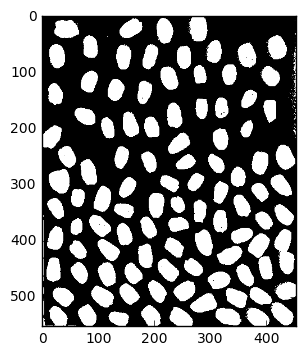

In [30]:
#Thresholding Dates by Inverting the Filtered Image
datesThresh = cv2.inRange(originalImage_gray,150,255)
datesThresh = cv2.bitwise_not(datesThresh)
#Display
plt.imshow(cv2.cvtColor(datesThresh, cv2.COLOR_GRAY2RGB))
cv2.imwrite("./assets/img/Dates Counting/datesThresh.png",datesThresh)

In [31]:
#Counting Estimated Contours (Dates)
datesThreshContoursImage, contours, hierarchy = cv2.findContours(datesThresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) 

originalImagePlotAreas = originalImage.copy()
originalImagePlotDates = originalImage.copy()
datesCounter = 0
for c in contours:
    if (cv2.contourArea(c) > 40):
        M = cv2.moments(c)
        if(M["m00"]>0):
            datesCounter += 1
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(originalImagePlotDates,"+", (cX,cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,255),2)
            cv2.putText(originalImagePlotAreas,str(cv2.contourArea(c)), (cX,cY), cv2.FONT_HERSHEY_SIMPLEX, 0.4 , (0,0,255),2)

Number of Estimated Dates: 104


True

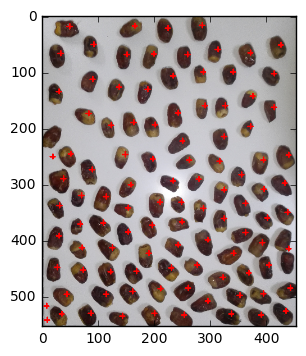

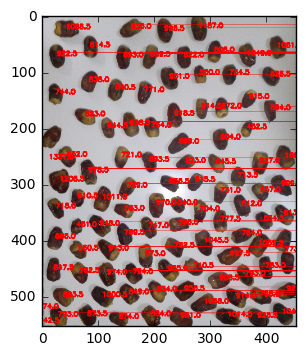

In [32]:
#Display 
print ("Number of Estimated Dates: "+str(datesCounter))
plt.imshow(cv2.cvtColor(originalImagePlotDates, cv2.COLOR_BGR2RGB));plt.figure()
cv2.imwrite("./assets/img/Dates Counting/originalImagePlotDates.png",originalImagePlotDates)
plt.imshow(cv2.cvtColor(originalImagePlotAreas, cv2.COLOR_BGR2RGB));plt.figure()
cv2.imwrite("./assets/img/Dates Counting/originalImagePlotAreas.png",originalImagePlotAreas)